# Behavior metrics: comparison across spheroids

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from pp_utils.core import generate_data_path_dict
from pp_utils.file_handling import df_main_loader
from pp_utils.trial_processor import TrialProcessor
from pp_utils import utils, utils_plot

In [3]:
import pickle

## Set paths, load main info df and clusters

In [4]:
data_path = generate_data_path_dict(Path("../data_processed/"))
raw_path = Path("../data_raw/")

### Data and output path

In [5]:
output_path = data_path["main"] / "data_summary"
tp_path = output_path / "trial_processor_object"

In [6]:
fig_path = Path("../figs")
if not fig_path.exists():
    fig_path.mkdir()

In [7]:
stat_path = Path("../stat")

### Load main dataframe

In [8]:
df_main = df_main_loader(
    folder=data_path["info_csv"], filename="main_info_append_09.csv",
)

### Load compiled trial info

In [9]:
df_summary = pd.read_csv(output_path / "data_summary_all.csv", index_col=0)

In [10]:
df_summary["TRIAL_TO_INCLUDE"] = df_main["TRIAL_TO_INCLUDE"]

In [11]:
df_summary["TCCT"] = df_main["LEFT"] + df_main["RIGHT"]

## Spheroid names and colors

In [12]:
SPH_COLORS = ["w", "gainsboro", "darkgrey"]  # L, M, S

In [13]:
SPH_STR = ["L", "M", "S"]
SPH_LABEL = ["2.9", "1.3", "1.1"]  # ["AR=2.9", "AR=1.3", "AR=1.1"]

In [14]:
sph_tcct = [f"{sph}_{tcct_type}" for sph, tcct_type in zip(["L", "M", "S"]*2, ["TC"]*3+["CT"]*3)]

In [15]:
sph_tcct

['L_TC', 'M_TC', 'S_TC', 'L_CT', 'M_CT', 'S_CT']

## Plot each panel separately first

Here we plot each variables separately for TC and CT trials, and also with all trials combined.

In [16]:
def plot_vio_jitter(ax, var_wanted):

    for sph_seq, sph in enumerate(["L", "M", "S"]):
        
        for tcct_type in ["TC", "CT"]:

            sph_index = (
            (df_summary["SPHEROID"] == sph)
                & (df_summary["CHOICE"] == 1)
                & df_summary["TRIAL_TO_INCLUDE"]
                & (df_summary["TCCT"] == tcct_type)
            )
            df_wanted = df_summary[sph_index].copy()

            idx_cross = df_wanted["time_buzz_onset_clean"] < df_wanted["time_decision"]

            vals_dot = df_wanted[var_wanted][~idx_cross].values
            vals_cross = df_wanted[var_wanted][idx_cross].values

            vals = np.hstack((vals_dot, vals_cross))
            vals = vals[~np.isnan(vals)]
            
            sph_seq_plot = sph_seq if tcct_type=="TC" else sph_seq + 3

            utils_plot.plot_vio(
                ax, vals, sph_seq_plot, widths=0.6, color=SPH_COLORS[sph_seq], qbar_alpha=1, alpha=1
            )
            utils_plot.plot_jitter(
                ax, sph_seq_plot, vals_dot, width=0.35, color="k", marker=".", markersize=3
            )
            utils_plot.plot_jitter(
                ax, sph_seq_plot, vals_cross, width=0.35, color="k", marker="x", markersize=5
            )


In [17]:
def plot_vio_jitter_combined(ax, var_wanted):

    for sph_seq, sph in enumerate(["L", "M", "S"]):
        
        # TC trials
        sph_index = (
        (df_summary["SPHEROID"] == sph)
            & (df_summary["CHOICE"] == 1)
            & df_summary["TRIAL_TO_INCLUDE"]
        )
        df_wanted = df_summary[sph_index].copy()

        idx_cross = df_wanted["time_buzz_onset_clean"] < df_wanted["time_decision"]

        vals_dot = df_wanted[var_wanted][~idx_cross].values
        vals_cross = df_wanted[var_wanted][idx_cross].values

        vals = np.hstack((vals_dot, vals_cross))
        vals = vals[~np.isnan(vals)]

        utils_plot.plot_vio(
            ax, vals, sph_seq, widths=0.3, color=SPH_COLORS[sph_seq], qbar_alpha=1, alpha=1
        )
        utils_plot.plot_jitter(
            ax, sph_seq, vals_dot, width=0.2, color="k", marker=".", markersize=3
        )
        utils_plot.plot_jitter(
            ax, sph_seq, vals_cross, width=0.2, color="k", marker="x", markersize=5
        )

### Time decision to touch

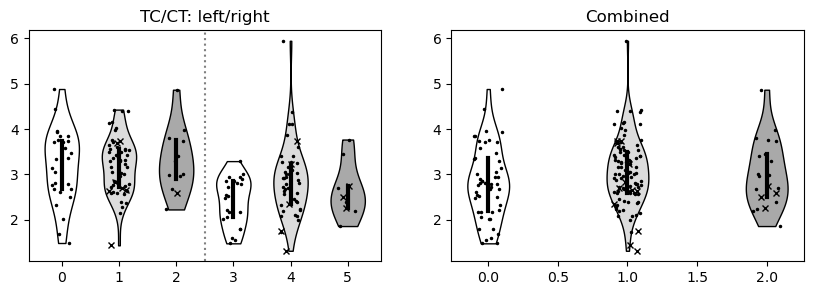

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
plot_vio_jitter(ax[0], var_wanted="time_decision2touch")
ax[0].axvline(2.5, color="grey", ls=":")
ax[0].set_title("TC/CT: left/right")

plot_vio_jitter_combined(ax[1], var_wanted="time_decision2touch")
ax[1].set_title("Combined")

plt.show()

### Decision distance to sphere

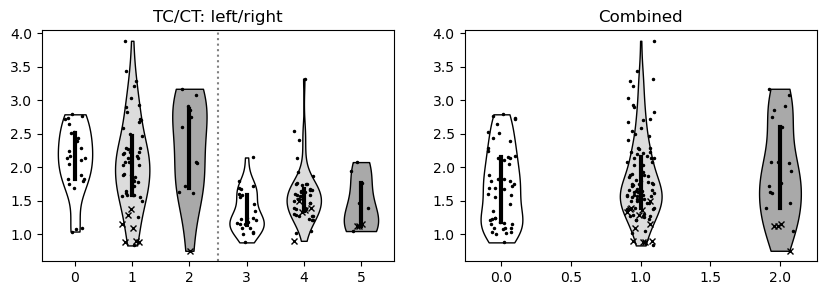

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
plot_vio_jitter(ax[0], var_wanted="range_decision_tar")
ax[0].axvline(2.5, color="grey", ls=":")
ax[0].set_title("TC/CT: left/right")

plot_vio_jitter_combined(ax[1], var_wanted="range_decision_tar")
ax[1].set_title("Combined")

plt.show()

### Decision distance to spheroid

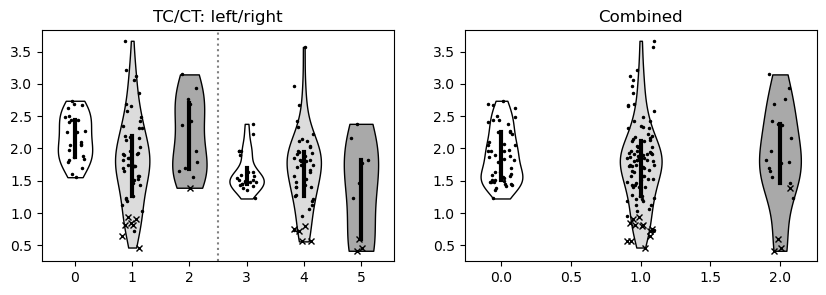

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
plot_vio_jitter(ax[0], var_wanted="range_decision_clu")
ax[0].axvline(2.5, color="grey", ls=":")
ax[0].set_title("TC/CT: left/right")

plot_vio_jitter_combined(ax[1], var_wanted="range_decision_clu")
ax[1].set_title("Combined")

plt.show()

### Time buzz onset to touch

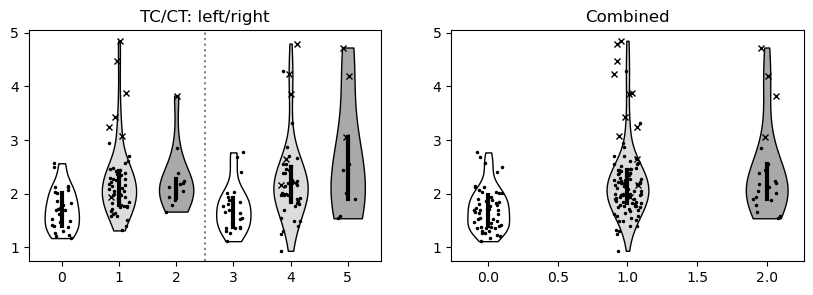

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
plot_vio_jitter(ax[0], var_wanted="time_buzz2touch")
ax[0].axvline(2.5, color="grey", ls=":")
ax[0].set_title("TC/CT: left/right")

plot_vio_jitter_combined(ax[1], var_wanted="time_buzz2touch")
ax[1].set_title("Combined")

plt.show()

### Distance to first buzzed object

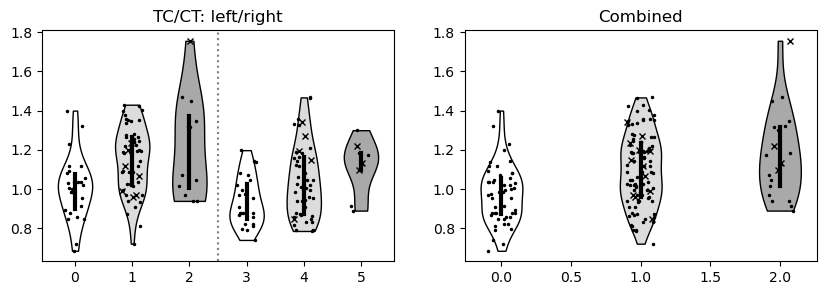

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
plot_vio_jitter(ax[0], var_wanted="range_buzz_onset_closest")
ax[0].axvline(2.5, color="grey", ls=":")
ax[0].set_title("TC/CT: left/right")

plot_vio_jitter_combined(ax[1], var_wanted="range_buzz_onset_closest")
ax[1].set_title("Combined")

plt.show()

### Scans on sphere / spheroid

In [23]:
# Scan parameters
scan_bins = np.arange(0, 13) - 0.5
scan_x = (scan_bins[:-1] + scan_bins[1:])/2
scan_bar_width = 0.25

In [24]:
# Vertical shift for CT clusters
vert_shift = 0.575

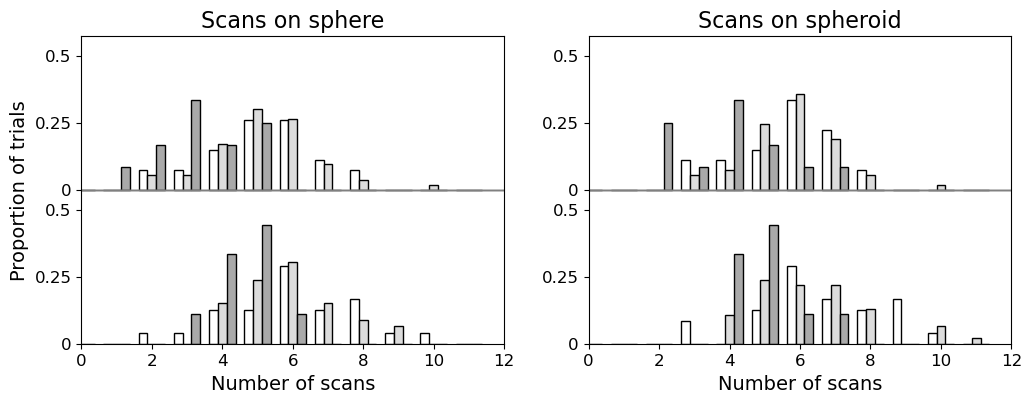

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax_scan0 = ax[0]
ax_scan1 = ax[1]

for sph_seq, sph in enumerate(["L", "M", "S"]):

    # CT trials -- TOP panel
    sph_index = (
    (df_summary["SPHEROID"] == sph)
        & (df_summary["CHOICE"] == 1)
        & df_summary["TRIAL_TO_INCLUDE"]
        & (df_summary["TCCT"] == "CT")
    )
    df_wanted = df_summary[sph_index].copy()
    ta_ch0, _ = np.histogram(df_wanted["scan_ch0"]-1, bins=scan_bins, density=True)
    ta_ch1, _ = np.histogram(df_wanted["scan_ch1"], bins=scan_bins, density=True)

    # Horiztonal bar shift
    if sph_seq == 0:
        shift = -scan_bar_width # if L shift bar leftward
    elif sph_seq == 2:
        shift = scan_bar_width  # if S shift bar rightward
    else:
        shift = 0  # if M does not shift
    
    bottom = 0  # no vertical shift
    ax_scan0.bar(
        scan_x + shift, ta_ch0,
        bottom=bottom, width=scan_bar_width, color=SPH_COLORS[sph_seq], edgecolor="k"
    )
    ax_scan1.bar(
        scan_x + shift, ta_ch1,
        bottom=bottom, width=scan_bar_width, color=SPH_COLORS[sph_seq], edgecolor="k"
    )

    # TC trials -- BOTTOM panel
    sph_index = (
    (df_summary["SPHEROID"] == sph)
        & (df_summary["CHOICE"] == 1)
        & df_summary["TRIAL_TO_INCLUDE"]
        & (df_summary["TCCT"] == "TC")
    )
    df_wanted = df_summary[sph_index].copy()
    ta_ch0, _ = np.histogram(df_wanted["scan_ch0"]-1, bins=scan_bins, density=True)
    ta_ch1, _ = np.histogram(df_wanted["scan_ch1"], bins=scan_bins, density=True)

    # Horiztonal bar shift
    if sph_seq == 0:
        shift = -scan_bar_width # if L shift bar leftward
    elif sph_seq == 2:
        shift = scan_bar_width  # if S shift bar rightward
    else:
        shift = 0  # if M does not shift
    
    bottom = vert_shift  # vertical shift
    ax_scan0.bar(
        scan_x + shift, ta_ch0,
        bottom=bottom, width=scan_bar_width, color=SPH_COLORS[sph_seq], edgecolor="k"
    )
    ax_scan1.bar(
        scan_x + shift, ta_ch1,
        bottom=bottom, width=scan_bar_width, color=SPH_COLORS[sph_seq], edgecolor="k"
    )

    # Horizontal divide line
    ax_scan0.axhline(bottom, color="grey", lw=1)
    ax_scan1.axhline(bottom, color="grey", lw=1)

for axx in [ax_scan0, ax_scan1]:
    axx.set_xlim(0, 12)
    axx.set_xticks(np.arange(0, 13, 2))
    axx.set_xticklabels(np.arange(0, 13, 2), fontsize=12)
    axx.set_yticks(np.array([0, 0.25, 0.5, vert_shift, vert_shift+0.25, vert_shift+0.5]))
    yticklabels = [0, 0.25, 0.5, 0, 0.25, 0.5]
    axx.set_yticklabels(yticklabels, fontsize=12)
    axx.set_ylim(0, vert_shift*2)
    axx.set_xlabel("Number of scans", fontsize=14)

ax_scan0.set_ylabel("Proportion of trials", fontsize=14)
ax_scan0.set_title("Scans on sphere", fontsize=16)
ax_scan1.set_title("Scans on spheroid", fontsize=16)

plt.show()

## Functions to annotate p values

In [26]:
def add_TCCT_text(ax):
    ylim = ax.get_ylim()
    ax.text(1, ylim[1]*1.02, "TC", fontsize=14, ha="center", fontweight="bold")
    ax.text(4, ylim[1]*1.02, "CT", fontsize=14, ha="center", fontweight="bold")

In [27]:
def annotate_p_val_spheroid(ax, df_stat, ratio=False, vert_h=np.array([0.9 , 0.82, 0.74, 0.9 , 0.82, 0.74])):
    # Get p values
    constrast_str = utils_plot.STAT_CONTRAST_RATIO_AR if ratio else utils_plot.STAT_CONTRAST_DIFF_AR
    p_val_spheroid = [
        utils_plot.get_p_val_group(
            df_stat, utils_plot.STAT_POSITION[idx], constrast_str[idx]
        )
        for idx in np.arange(6)
    ]
    
    # Scale vertical position
    ylim = ax.get_ylim()
    vert_h = vert_h * (ylim[1] - ylim[0]) + ylim[0]

    # Annotate
    for idx in np.arange(6):
        ax.plot(utils_plot.STAT_PLOT_XPOS[idx], vert_h[idx] * np.ones(2), color="k")#, marker=".")
        ax.text(
            np.mean(utils_plot.STAT_PLOT_XPOS[idx]), vert_h[idx], f"{p_val_spheroid[idx]:2.2E}",
            ha="center", va="bottom", fontsize=9
        )

In [28]:
def annotate_p_val_position(ax, df_stat):
    p_val_position = utils_plot.get_p_val_position(df_stat)
    ax.annotate('', xy=(0.32, 1.02), xycoords='axes fraction', xytext=(0.68, 1.02),
        arrowprops=dict(arrowstyle="-", color='k', lw=1.2))
    ylim = ax.get_ylim()
    ax.text(
        2.5, ylim[1]*1.02, f"{p_val_position:2.2E}",
        ha="center", va="bottom", fontsize=9
    )

In [29]:
def annotate_p_val_scan(
    ax, df_stat_position, df_stat_spheroid,
    ratio = False,
    vert_text = -0.3,
    horz_text_left = 0,
    horz_text_right= 6,
    **kwargs
):
    
    # Get p values
    constrast_str = utils_plot.STAT_CONTRAST_RATIO_AR if ratio else utils_plot.STAT_CONTRAST_DIFF_AR
    p_val_spheroid = [
        utils_plot.get_p_val_group(
            df_stat_spheroid, utils_plot.STAT_POSITION[idx], constrast_str[idx]
        )
        for idx in np.arange(6)
    ]
    p_val_position = utils_plot.get_p_val_position(df_stat_position)

    ax.text(
        horz_text_left, vert_text, f"TC v. CT: p={p_val_position:2.2E}",
        ha="left", va="center", fontsize=9
    )
    # TC comparisons
    for idx in np.arange(3):
        ax.text(
            horz_text_left, vert_text - 0.08*(idx+1),
            f"{utils_plot.STAT_CONTRAST_STR_AR[idx]}{p_val_spheroid[idx]:2.2E}",
            ha="left", va="center", fontsize=9
        )
    # CT comparisons
    for idx in np.arange(3):
        ax.text(
            horz_text_right, vert_text - 0.08*(idx+1),
            f"{utils_plot.STAT_CONTRAST_STR_AR[idx+3]}{p_val_spheroid[idx+3]:2.2E}",
            ha="left", va="center", fontsize=9
        )

## Put everything into a figure: old version - TC/CT under each spheroid

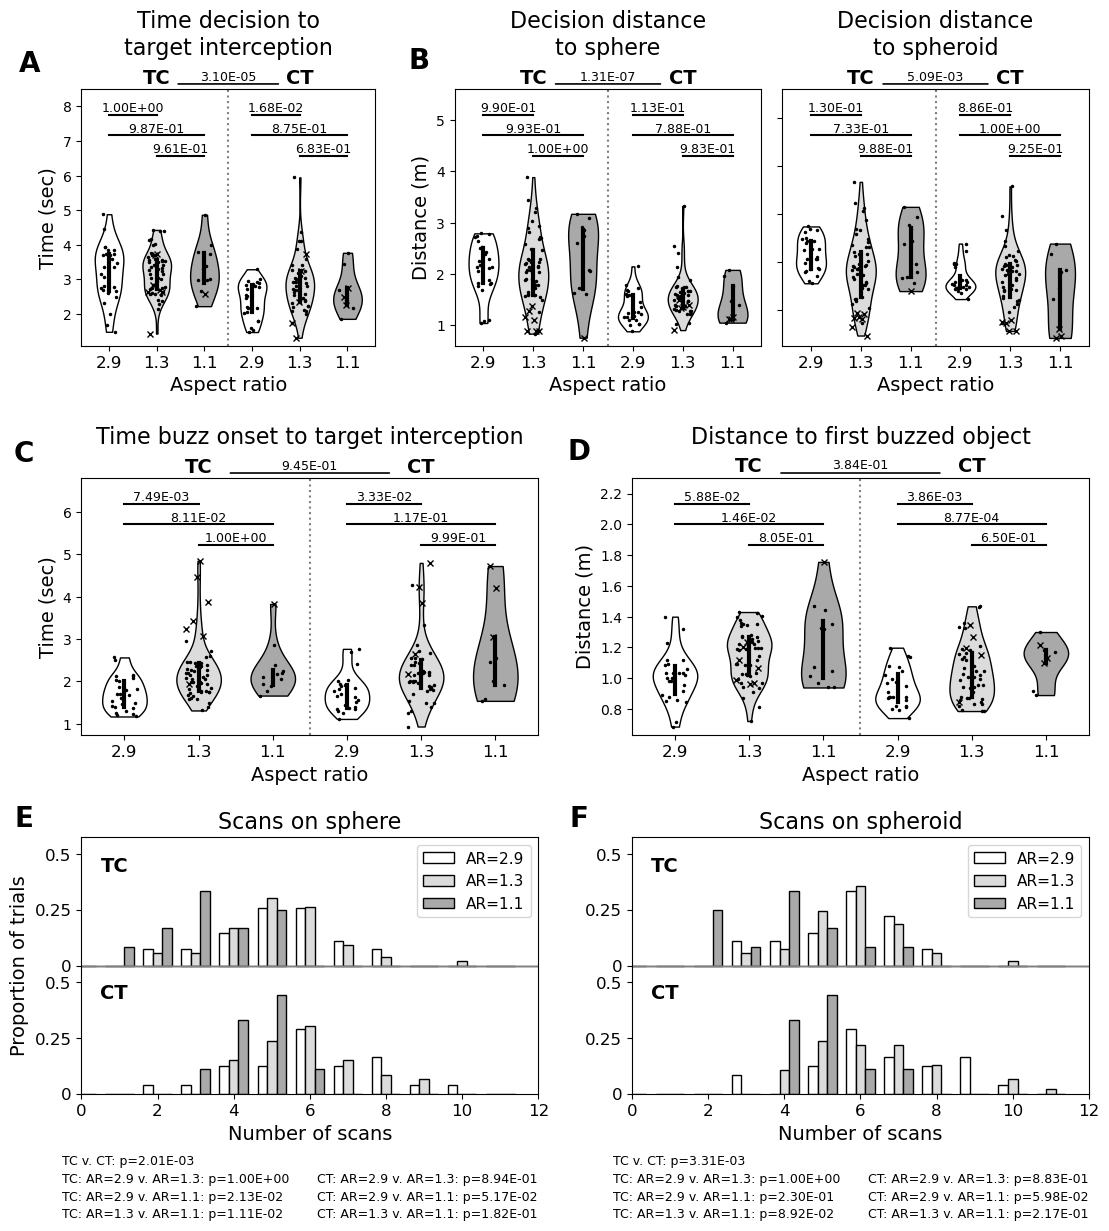

In [30]:
fig = plt.figure(figsize=(13, 13), facecolor="w")#, constrained_layout=True)

gs = fig.add_gridspec(3, 12)

plt.subplots_adjust(hspace=0.45)



# Decision: Time to touch
# ===================================
ax_decision_time = fig.add_subplot(gs[0, :4])
# ===================================
plot_vio_jitter(ax=ax_decision_time, var_wanted="time_decision2touch")
ax_decision_time.set_title("Time decision to\ntarget interception\n", fontsize=16)
ax_decision_time.set_ylabel("Time (sec)", fontsize=14)

# add vertical space
ylim = ax_decision_time.get_ylim()
ax_decision_time.set_ylim(ylim[0], 8.5)

# annotation
df_stat_position = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['A']}_position_contrast.csv")
df_stat_spheroid = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['A']}_spheroid_contrast.csv")
annotate_p_val_position(ax_decision_time, df_stat_position)
annotate_p_val_spheroid(ax_decision_time, df_stat_spheroid)
add_TCCT_text(ax_decision_time)



# Decision: distance to target
# ===================================
ax_decision_dist_t = fig.add_subplot(gs[0, 4:8])
# ===================================
plot_vio_jitter(ax=ax_decision_dist_t, var_wanted="range_decision_tar")
ax_decision_dist_t.set_title("Decision distance\nto sphere\n", fontsize=16)
ax_decision_dist_t.set_ylabel("Distance (m)", fontsize=14)

# add vertical space
ylim = ax_decision_dist_t.get_ylim()
ax_decision_dist_t.set_ylim(ylim[0], 5.6)

# annotation
df_stat_position = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['B1']}_position_contrast.csv")
df_stat_spheroid = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['B1']}_spheroid_contrast.csv")
annotate_p_val_position(ax_decision_dist_t, df_stat_position)
annotate_p_val_spheroid(ax_decision_dist_t, df_stat_spheroid)
add_TCCT_text(ax_decision_dist_t)



# Decision: distance to clutter
# ===================================
ax_decision_dist_c = fig.add_subplot(gs[0, 8:])
# ===================================
plot_vio_jitter(ax=ax_decision_dist_c, var_wanted="range_decision_clu")
ax_decision_dist_c.set_title("Decision distance\nto spheroid\n", fontsize=16)
ax_decision_dist_c.set_yticklabels("")

# add vertical space
ylim = ax_decision_dist_c.get_ylim()
ax_decision_dist_c.set_ylim(ylim[0], 5.6)

# annotation
df_stat_position = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['B2']}_position_contrast.csv")
df_stat_spheroid = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['B2']}_spheroid_contrast.csv")
annotate_p_val_position(ax_decision_dist_c, df_stat_position)
annotate_p_val_spheroid(ax_decision_dist_c, df_stat_spheroid)
add_TCCT_text(ax_decision_dist_c)



# Buzz onset: Time to touch
# ===================================
ax_buzz_time = fig.add_subplot(gs[1, :6])
# ===================================
plot_vio_jitter(ax=ax_buzz_time, var_wanted="time_buzz2touch")
ax_buzz_time.set_title("Time buzz onset to target interception\n", fontsize=16)
ax_buzz_time.set_ylabel("Time (sec)", fontsize=14)

# add vertical space
ylim = ax_buzz_time.get_ylim()
ax_buzz_time.set_ylim(ylim[0], 6.8)

# annotation
df_stat_position = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['C']}_position_contrast.csv")
df_stat_spheroid = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['C']}_spheroid_contrast.csv")
annotate_p_val_position(ax_buzz_time, df_stat_position)
annotate_p_val_spheroid(ax_buzz_time, df_stat_spheroid)
add_TCCT_text(ax_buzz_time)



# Buzz onset: Distance to the first buzzed object
# ===================================
ax_buzz_dist = fig.add_subplot(gs[1, 6:])
# ===================================
plot_vio_jitter(ax=ax_buzz_dist, var_wanted="range_buzz_onset_closest")
ax_buzz_dist.set_title("Distance to first buzzed object\n", fontsize=16)
ax_buzz_dist.set_ylabel("Distance (m)", fontsize=14)

# add vertical space
ylim = ax_buzz_dist.get_ylim()
ax_buzz_dist.set_ylim(ylim[0], 2.3)

# annotation
df_stat_position = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['D']}_position_contrast.csv")
df_stat_spheroid = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['D']}_spheroid_contrast.csv")
annotate_p_val_position(ax_buzz_dist, df_stat_position)
annotate_p_val_spheroid(ax_buzz_dist, df_stat_spheroid)
add_TCCT_text(ax_buzz_dist)




# Add xaxis label and middle dashed line
for axx in [
    ax_decision_time, ax_decision_dist_t, ax_decision_dist_c,
    ax_buzz_time, ax_buzz_dist
]:
    axx.set_xticks(np.arange(6))
    axx.set_xticklabels(SPH_LABEL * 2, fontsize=12)
    axx.set_xlabel("Aspect ratio", fontsize=14)
    axx.axvline(2.5, color="grey", ls=":")
    
    
# Adjust x-position of decision dist to T and C panels
axx = ax_decision_time
axx_pos = axx.get_position()
axx.set_position([
    axx_pos.x0, axx_pos.y0, axx_pos.width*0.9, axx_pos.height
])
axx = ax_decision_dist_t
axx_pos = axx.get_position()
axx.set_position([
    axx_pos.x0+axx_pos.width*0.1, axx_pos.y0, axx_pos.width*0.94, axx_pos.height
])
axx = ax_decision_dist_c
axx_pos = axx.get_position()
axx.set_position([
    axx_pos.x0+axx_pos.width*0.06, axx_pos.y0, axx_pos.width*0.94, axx_pos.height
])


# Adjust width of buzz panels
axx = ax_buzz_time
axx_pos = axx.get_position()
axx.set_position([
    axx_pos.x0, axx_pos.y0, axx_pos.width*0.92, axx_pos.height
])
axx = ax_buzz_dist
axx_pos = axx.get_position()
axx.set_position([
    axx_pos.x0+axx_pos.width*0.08, axx_pos.y0, axx_pos.width*0.92, axx_pos.height
])

    

# Number of scans
# ===================================
ax_scan0 = fig.add_subplot(gs[2, :6])
ax_scan1 = fig.add_subplot(gs[2, 6:])
# ===================================

for sph_seq, sph in enumerate(["L", "M", "S"]):

    # CT trials -- TOP panel
    sph_index = (
    (df_summary["SPHEROID"] == sph)
        & (df_summary["CHOICE"] == 1)
        & df_summary["TRIAL_TO_INCLUDE"]
        & (df_summary["TCCT"] == "CT")
    )
    df_wanted = df_summary[sph_index].copy()
    ta_ch0, _ = np.histogram(df_wanted["scan_ch0"]-1, bins=scan_bins, density=True)
    ta_ch1, _ = np.histogram(df_wanted["scan_ch1"], bins=scan_bins, density=True)

    # Horiztonal bar shift
    if sph_seq == 0:
        shift = -scan_bar_width # if L shift bar leftward
    elif sph_seq == 2:
        shift = scan_bar_width  # if S shift bar rightward
    else:
        shift = 0  # if M does not shift
    
    bottom = 0  # no vertical shift
    ax_scan0.bar(
        scan_x + shift, ta_ch0,
        bottom=bottom, width=scan_bar_width, color=SPH_COLORS[sph_seq], edgecolor="k"
    )
    ax_scan1.bar(
        scan_x + shift, ta_ch1,
        bottom=bottom, width=scan_bar_width, color=SPH_COLORS[sph_seq], edgecolor="k"
    )

    # TC trials -- BOTTOM panel
    sph_index = (
    (df_summary["SPHEROID"] == sph)
        & (df_summary["CHOICE"] == 1)
        & df_summary["TRIAL_TO_INCLUDE"]
        & (df_summary["TCCT"] == "TC")
    )
    df_wanted = df_summary[sph_index].copy()
    ta_ch0, _ = np.histogram(df_wanted["scan_ch0"]-1, bins=scan_bins, density=True)
    ta_ch1, _ = np.histogram(df_wanted["scan_ch1"], bins=scan_bins, density=True)

    # Horiztonal bar shift
    if sph_seq == 0:
        shift = -scan_bar_width # if L shift bar leftward
    elif sph_seq == 2:
        shift = scan_bar_width  # if S shift bar rightward
    else:
        shift = 0  # if M does not shift
    
    bottom = vert_shift  # vertical shift
    ax_scan0.bar(
        scan_x + shift, ta_ch0,
        bottom=bottom, width=scan_bar_width, color=SPH_COLORS[sph_seq], edgecolor="k"
    )
    ax_scan1.bar(
        scan_x + shift, ta_ch1,
        bottom=bottom, width=scan_bar_width, color=SPH_COLORS[sph_seq], edgecolor="k"
    )

    # Horizontal divide line
    ax_scan0.axhline(bottom, color="grey", lw=1)
    ax_scan1.axhline(bottom, color="grey", lw=1)

for axx in [ax_scan0, ax_scan1]:
    axx.set_xlim(0, 12)
    axx.set_xticks(np.arange(0, 13, 2))
    axx.set_xticklabels(np.arange(0, 13, 2), fontsize=12)
    axx.set_yticks(np.array([0, 0.25, 0.5, vert_shift, vert_shift+0.25, vert_shift+0.5]))
    yticklabels = [0, 0.25, 0.5, 0, 0.25, 0.5]
    axx.set_yticklabels(yticklabels, fontsize=12)
    axx.set_ylim(0, vert_shift*2)
    axx.set_xlabel("Number of scans", fontsize=14)

ax_scan0.set_ylabel("Proportion of trials", fontsize=14)
ax_scan0.set_title("Scans on sphere", fontsize=16)
ax_scan1.set_title("Scans on spheroid", fontsize=16)



# annotation
df_stat_position = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['E']}_position_contrast.csv")
df_stat_spheroid = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['E']}_spheroid_contrast.csv")
annotate_p_val_scan(
    ax_scan0, df_stat_position, df_stat_spheroid, ratio=False,
    horz_text_left=-0.5, horz_text_right=6.2
)

df_stat_position = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['F']}_position_contrast.csv")
df_stat_spheroid = pd.read_csv(stat_path / f"ARall_{utils_plot.STAT_FILENAME_MIDDLE['F']}_spheroid_contrast.csv")
annotate_p_val_scan(
    ax_scan1, df_stat_position, df_stat_spheroid, ratio=False,
    horz_text_left=-0.5, horz_text_right=6.2
)



# Adjust width of scan panels
axx = ax_scan0
axx_pos = axx.get_position()
axx.set_position([
    axx_pos.x0, axx_pos.y0, axx_pos.width*0.92, axx_pos.height
])
axx = ax_scan1
axx_pos = axx.get_position()
axx.set_position([
    axx_pos.x0+axx_pos.width*0.08, axx_pos.y0, axx_pos.width*0.92, axx_pos.height
])


# Adjust y-position of 2nd and 3rd rows
for axx in [ax_decision_time, ax_decision_dist_t, ax_decision_dist_c]:
    axx_pos = axx.get_position()
    axx.set_position([
        axx_pos.x0, axx_pos.y0-0.017, axx_pos.width, axx_pos.height  # 0.015
    ])
for axx in [ax_buzz_time, ax_buzz_dist]:
    axx_pos = axx.get_position()
    axx.set_position([
        axx_pos.x0, axx_pos.y0-0.03, axx_pos.width, axx_pos.height  # 0.012
    ])
for axx in [ax_scan0, ax_scan1]:
    axx_pos = axx.get_position()
    axx.set_position([
        axx_pos.x0, axx_pos.y0-0.02, axx_pos.width, axx_pos.height  # 0.012
    ])

    
# Add scan histogram legend
ax_scan0_pos = ax_scan0.get_position()
ax_scan1_pos = ax_scan1.get_position()

for ax_pos in [ax_scan0_pos, ax_scan1_pos]:
    ax_mock = plt.axes(ax_pos)
    ax_mock.patch.set_alpha(0)
    ax_mock.set_axis_off()
    for seq in range(3):
        ax_mock.bar(np.nan, np.nan,
            edgecolor="k", color=SPH_COLORS[seq], label=f"AR={SPH_LABEL[seq]}")
    ax_mock.legend(bbox_to_anchor=(1, 1), fontsize=11)
    
    

# Label panels
ax_decision_time.text(-1.9, 9, "A", fontsize=20, fontweight="bold")
ax_decision_dist_t.text(-1.5, 6, "B", fontsize=20, fontweight="bold")
ax_buzz_time.text(-1.5, 7.2, "C", fontsize=20, fontweight="bold")
ax_buzz_dist.text(-1.45, 2.42, "D", fontsize=20, fontweight="bold")
ax_scan0.text(-1.75, 1.2, "E", fontsize=20, fontweight="bold")
ax_scan1.text(-1.65, 1.2, "F", fontsize=20, fontweight="bold")


# Add subpanel labels
ax_scan0.text(0.5, 1.02, "TC", fontsize=14, fontweight="bold", va="center")
ax_scan0.text(0.5, 0.45, "CT", fontsize=14, fontweight="bold", va="center")
ax_scan1.text(0.5, 1.02, "TC", fontsize=14, fontweight="bold", va="center")
ax_scan1.text(0.5, 0.45, "CT", fontsize=14, fontweight="bold", va="center")



plt.show()

fig.savefig(fig_path / "fig_behavior_metrics_allAR.png", dpi=300, bbox_inches="tight")
